In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('combine_0329.csv', index_col=0)

C:\Users\jinji\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,18,19,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(163712, 45)

In [5]:
with pd.option_context ('display.max.columns', None):
    display (df.head())

,id,song,album,artist,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,speechiness_x,tempo_x,time_signature,valence_x,album_id,date,date_year,duration_ms_d,com_f_x,acousticness_y,artists,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,name,popularity,release_date,speechiness_y,tempo_y,valence_y,year,release_date_year,artists_d,com_f_y,popularity_dummy,lyrics
0,1ou6HpgzXuBdbJDaixv6wb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996,"['Frédéric Chopin', 'Ania Dorfmann']",0.426,277107,0.1750,0,0.875,8,0.110,-12.942,1,"Waltz in A-Flat Major, Op. 34, No. 1 ""Valse br...",0,1953,0.0365,110.460,0.2360,1953,1953,"Frédéric Chopin', 'Ania Dorfmann","Frédéric Chopin', 'Ania Dorfmann277107Waltz in...",0,No lyrics
1,1pvEJZyOouTLeMibeqRw0o,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.804,['Yves Montand'],0.684,171800,0.2390,0,0.000,7,0.680,-21.143,1,"Le peintre, la pomme & Picasso - Récital au Th...",0,1953,0.8450,137.792,0.5200,1953,1953,Yves Montand,"Yves Montand171800Le peintre, la pomme & Picas...",0,No lyrics
2,1pzvar6wmBlA2FbPCmQ4kC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965,['Thouraya Helmy'],0.777,261000,0.3390,0,0.000,8,0.153,-10.286,1,Dr Jekyll W Mr Hyde,0,1953-01-01,0.0409,88.750,0.9220,1953,1953,Thouraya Helmy,Thouraya Helmy261000Dr Jekyll W Mr Hyde0.9650....,0,No lyrics
3,1qCK56S1L0RUtPuBqfUNZK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.952,"['Johannes Brahms', 'Isaac Stern', 'Alexander ...",0.193,739667,0.1300,0,0.801,5,0.206,-17.761,1,"String Sextet No. 1 in B-Flat Major, Op. 18: I...",0,1953,0.0382,97.903,0.0867,1953,1953,"Johannes Brahms', 'Isaac Stern', 'Alexander Sc...","Johannes Brahms', 'Isaac Stern', 'Alexander Sc...",0,No lyrics
4,1qLQqaapnZdJjxUJdo6ecN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.987,['Hillel and Aviva'],0.537,212427,0.0758,0,0.000,6,0.076,-17.677,1,Ma Navoo (Isaiah 52 7-8),0,1953-01-01,0.0645,111.109,0.4060,1953,1953,Hillel and Aviva,Hillel and Aviva212427Ma Navoo (Isaiah 52 7-8)...,0,No lyrics


In [6]:
df.columns

Index(['id', 'song', 'album', 'artist', 'acousticness_x', 'danceability_x',
       'duration_ms_x', 'energy_x', 'instrumentalness_x', 'key_x',
       'liveness_x', 'loudness_x', 'mode_x', 'speechiness_x', 'tempo_x',
       'time_signature', 'valence_x', 'album_id', 'date', 'date_year',
       'duration_ms_d', 'com_f_x', 'acousticness_y', 'artists',
       'danceability_y', 'duration_ms_y', 'energy_y', 'explicit',
       'instrumentalness_y', 'key_y', 'liveness_y', 'loudness_y', 'mode_y',
       'name', 'popularity', 'release_date', 'speechiness_y', 'tempo_y',
       'valence_y', 'year', 'release_date_year', 'artists_d', 'com_f_y',
       'popularity_dummy', 'lyrics'],
      dtype='object')

In [7]:
bill_col=['id', 'song', 'album', 'artist', 'acousticness_x', 'danceability_x',
       'duration_ms_x', 'energy_x', 'instrumentalness_x', 'key_x',
       'liveness_x', 'loudness_x', 'mode_x', 'speechiness_x', 'tempo_x',
       'time_signature', 'valence_x', 'album_id', 'date', 'date_year',
       'duration_ms_d', 'com_f_x']

spotify_col = ['id', 'acousticness_y', 'artists',
       'danceability_y', 'duration_ms_y', 'energy_y', 'explicit',
       'instrumentalness_y', 'key_y', 'liveness_y', 'loudness_y', 'mode_y',
       'name', 'popularity', 'release_date', 'speechiness_y', 'tempo_y',
       'valence_y', 'year', 'release_date_year', 'artists_d', 'com_f_y',
       'popularity_dummy']

lyrics_col=['lyrics']

### check na

In [7]:
total_na = df.isnull().sum()
percent_na = (df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([total_na, percent_na], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']!=0]

,Total,Percent
song,129000,0.787969
album,129000,0.787969
artist,129000,0.787969
acousticness_x,129000,0.787969
danceability_x,129000,0.787969
duration_ms_x,129000,0.787969
energy_x,129000,0.787969
instrumentalness_x,129000,0.787969
key_x,129000,0.787969
liveness_x,129000,0.787969


##### check with 2 songs with null

In [8]:
with pd.option_context ('display.max.columns', None):
    display (df[df['lyrics'].isnull()])

,id,song,album,artist,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,speechiness_x,tempo_x,time_signature,valence_x,album_id,date,date_year,duration_ms_d,com_f_x,acousticness_y,artists,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,name,popularity,release_date,speechiness_y,tempo_y,valence_y,year,release_date_year,artists_d,com_f_y,popularity_dummy,lyrics
93900,2RRFwnZ8xhh8JEXKCCPfHh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743,['015B'],0.563,277960,0.413,0,0.000,2,0.409,-7.045,1,Goodbye Now,11,2019-02-27,0.0311,141.803,0.39,2019,2019,015B,015B277960Goodbye Now0.7430.5630.41300.020.409...,0,NaN
97337,2yvzztug9rbDuOSm0FSe8M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790,['Teddy Wilson'],0.379,214307,0.482,0,0.793,0,0.153,-16.318,1,I've Found A New Baby,9,1957-01-01,0.0507,151.954,0.84,1957,1957,Teddy Wilson,Teddy Wilson214307I've Found A New Baby0.790.3...,0,NaN


In [9]:
df[df['lyrics'].isnull()]['popularity']

93900    11
97337     9
Name: popularity, dtype: int64

In [10]:
df[df['lyrics'].isnull()]['popularity_dummy']

93900    0
97337    0
Name: popularity_dummy, dtype: int64

In [11]:
# fill no lyrics
df['lyrics'] = df['lyrics'].fillna('No lyrics')

#check null value again 
total_na = df.isnull().sum()
percent_na = (df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([total_na, percent_na], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']!=0]

,Total,Percent
song,129000,0.787969
album,129000,0.787969
artist,129000,0.787969
acousticness_x,129000,0.787969
danceability_x,129000,0.787969
duration_ms_x,129000,0.787969
energy_x,129000,0.787969
instrumentalness_x,129000,0.787969
key_x,129000,0.787969
liveness_x,129000,0.787969


### percentage of no lyrics

In [12]:
df_no_ly = df[df['lyrics']=='No lyrics']
df_ly = df[df['lyrics']!='No lyrics']

In [13]:
print('all: {}'.format(df.shape[0]))
print('no lyrics: {}'.format(df_no_ly.shape[0]))
print('with lyrics: {}'.format(df_ly.shape[0]))

all: 163712
no lyrics: 70085
with lyrics: 93627


In [14]:
df_no_ly.shape[0]/df.shape[0]

0.4280993451915559

In [20]:
total_na = df_no_ly.isnull().sum()
percent_na = (df_no_ly.isnull().sum()/df_no_ly.isnull().count())
missing_data = pd.concat([total_na, percent_na], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']!=0]

,Total,Percent
song,66018,0.94197
album,66018,0.94197
artist,66018,0.94197
acousticness_x,66018,0.94197
danceability_x,66018,0.94197
duration_ms_x,66018,0.94197
energy_x,66018,0.94197
instrumentalness_x,66018,0.94197
key_x,66018,0.94197
liveness_x,66018,0.94197


In [21]:
total_na = df_ly.isnull().sum()
percent_na = (df_ly.isnull().sum()/df_ly.isnull().count())
missing_data = pd.concat([total_na, percent_na], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']!=0]

,Total,Percent
song,62982,0.672691
album,62982,0.672691
artist,62982,0.672691
acousticness_x,62982,0.672691
danceability_x,62982,0.672691
duration_ms_x,62982,0.672691
energy_x,62982,0.672691
instrumentalness_x,62982,0.672691
key_x,62982,0.672691
liveness_x,62982,0.672691


##### double check with popularity_dummy

In [66]:
df['popularity_dummy'].sum()/df.shape[0]

0.21203088350273652

In [29]:
df[df['popularity_dummy']==1].shape[0]/df.shape[0]

0.21203088350273652

In [67]:
df_no_ly['popularity_dummy'].sum()/df_no_ly.shape[0]

0.058029535563958054

In [68]:
df_ly['popularity_dummy'].sum()/df_ly.shape[0]

0.3273094299721234

##### the majority of songs with no lyrics are not on billboard

### check with popularity

In [70]:
df['popularity'].describe()

count    163712.000000
mean         25.774293
std          21.910178
min           0.000000
25%           1.000000
50%          25.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

In [71]:
df_ly['popularity'].describe()

count    93627.000000
mean        35.963440
std         19.761426
min          0.000000
25%         23.000000
50%         36.000000
75%         50.000000
max        100.000000
Name: popularity, dtype: float64

In [72]:
df_no_ly['popularity'].describe()

count    70085.000000
mean        12.162545
std         16.604410
min          0.000000
25%          0.000000
50%          2.000000
75%         23.000000
max         85.000000
Name: popularity, dtype: float64

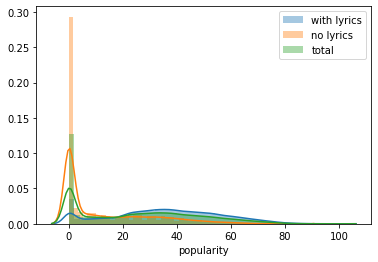

In [76]:
#plot distribution
sns.distplot(df_ly['popularity'], label='with lyrics')
sns.distplot(df_no_ly['popularity'], label='no lyrics')
sns.distplot(df['popularity'], label='total')
plt.legend()

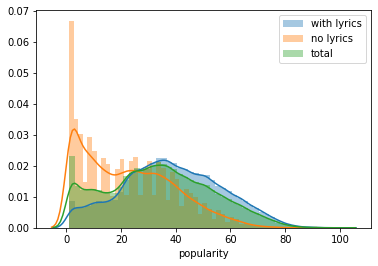

In [75]:
#plot distribution for popularity > 0
sns.distplot(df_ly[df_ly['popularity']>0]['popularity'], label='with lyrics')
sns.distplot(df_no_ly[df_no_ly['popularity']>0]['popularity'], label='no lyrics')
sns.distplot(df[df['popularity']>0]['popularity'], label='total')
plt.legend()

Majority of songs with no lyrics are not popular on Spotify. Distribution of all songs and songs with lyrics are quite similar.

### check with release year

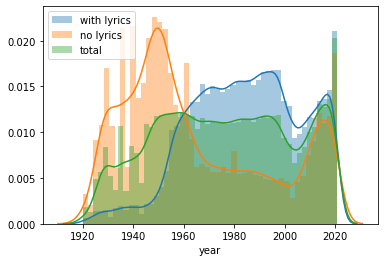

In [85]:
#plot distribution
sns.distplot(df_ly['year'], label='with lyrics')
sns.distplot(df_no_ly['year'], label='no lyrics')
sns.distplot(df['year'], label='total')
plt.legend()

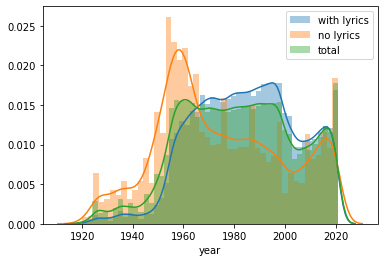

In [86]:
#plot distribution for popularity > 0
sns.distplot(df_ly[df_ly['popularity']>0]['year'], label='with lyrics')
sns.distplot(df_no_ly[df_no_ly['popularity']>0]['year'], label='no lyrics')
sns.distplot(df[df['popularity']>0]['year'], label='total')
plt.legend()

More of songs with no lyrics are old songs. Distribution of all songs and songs with lyrics are quite similar.

### check with other acoustic features

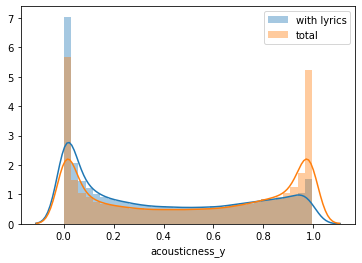

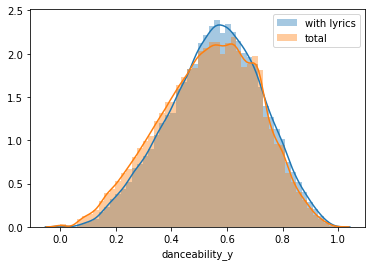

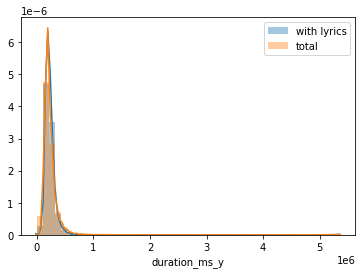

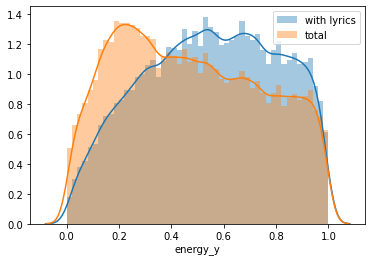

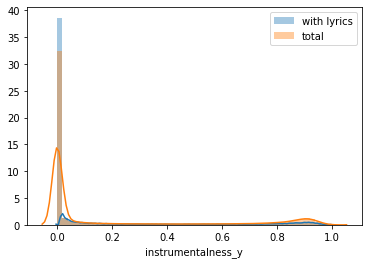

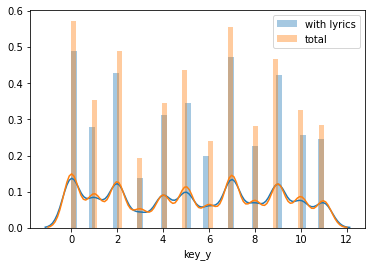

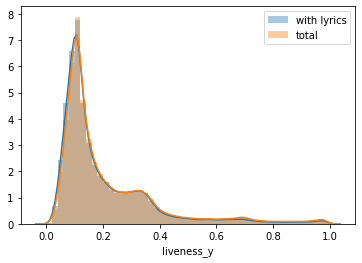

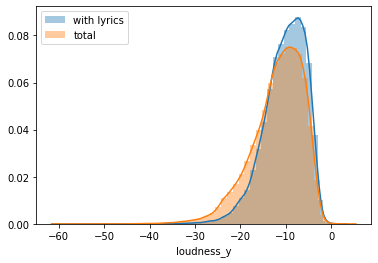

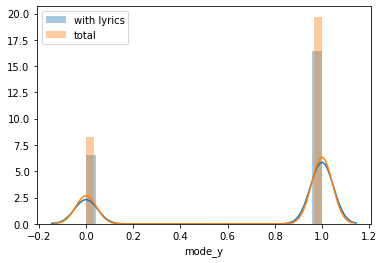

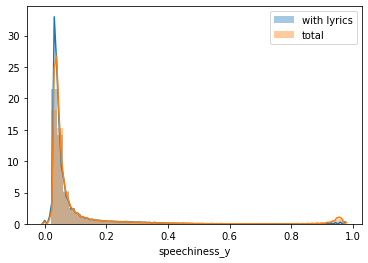

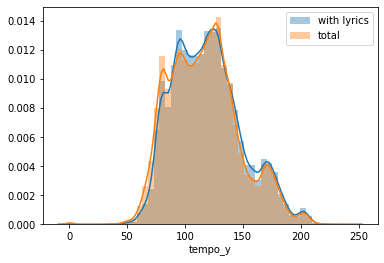

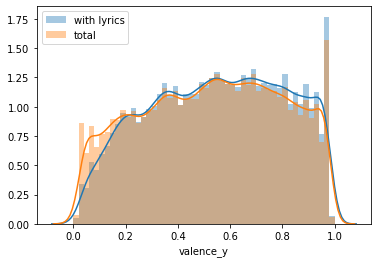

In [93]:
acoustic_col = ['acousticness_y', 'danceability_y', 'duration_ms_y', 'energy_y', 'instrumentalness_y', 
                'key_y', 'liveness_y', 'loudness_y', 'mode_y', 'speechiness_y', 'tempo_y', 'valence_y']
for i in acoustic_col:
    sns.distplot(df_ly[i], label='with lyrics')
    sns.distplot(df[i], label='total')
    plt.legend()
    plt.show()

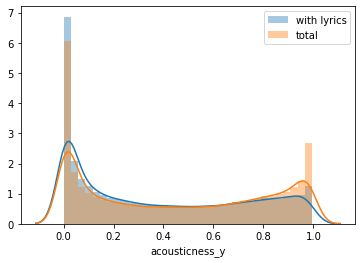

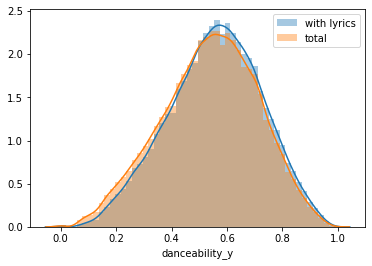

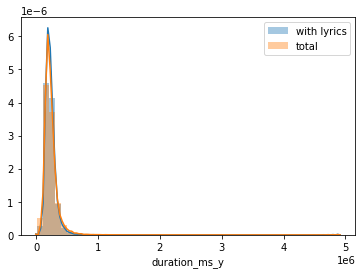

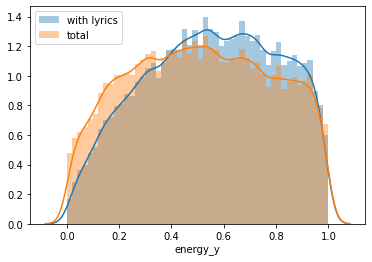

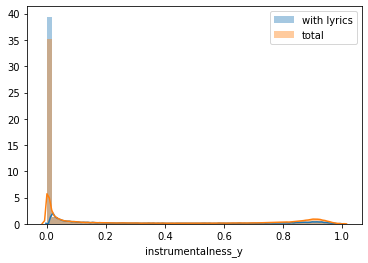

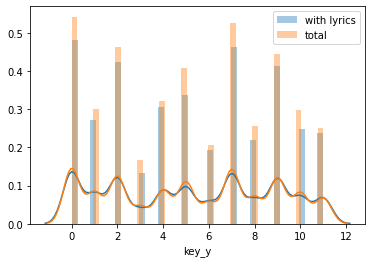

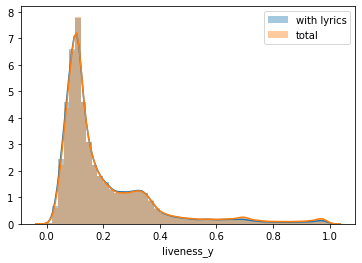

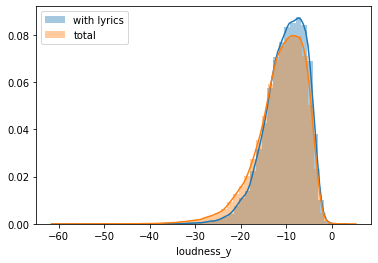

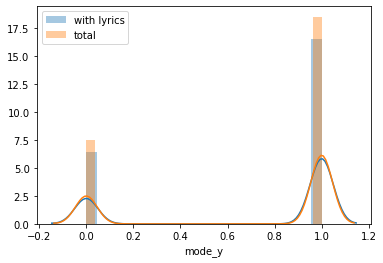

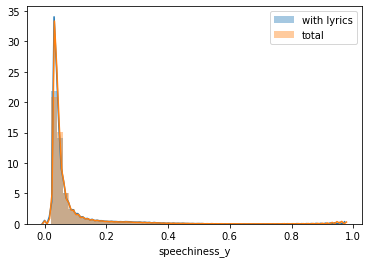

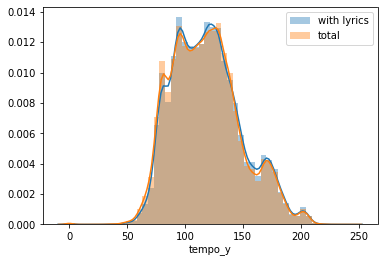

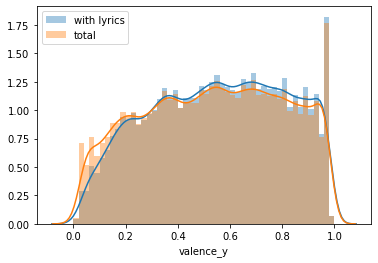

In [94]:
acoustic_col = ['acousticness_y', 'danceability_y', 'duration_ms_y', 'energy_y', 'instrumentalness_y', 
                'key_y', 'liveness_y', 'loudness_y', 'mode_y', 'speechiness_y', 'tempo_y', 'valence_y']
for i in acoustic_col:
    sns.distplot(df_ly[df_ly['popularity']>0][i], label='with lyrics')
    sns.distplot(df[df['popularity']>0][i], label='total')
    plt.legend()
    plt.show()

In [100]:
df['explicit'].sum()/df['explicit'].count()

0.06817459929632526

In [101]:
df_ly['explicit'].sum()/df_ly['explicit'].count()

0.08267914170057783

In [102]:
df[df['popularity']>0]['explicit'].sum()/df[df['popularity']>0]['explicit'].count()

0.06386007890048358

In [103]:
df_ly[df_ly['popularity']>0]['explicit'].sum()/df_ly[df_ly['popularity']>0]['explicit'].count()

0.08521103507952954

### for q3

### only focus on those with popularity_dummy= 1

In [18]:
df_no_ly[df_no_ly["popularity_dummy"]==1].shape[0]/df[df["popularity_dummy"]==1].shape[0]

0.1171640931090113

#### we find it take up 11% not very small. now check the distribution

In [25]:
df_no_ly3 = df_no_ly[df_no_ly["popularity_dummy"]==1]

In [26]:
df3 = df[df["popularity_dummy"]==1]

In [27]:
df_ly3 = df_ly[df_ly["popularity_dummy"]==1]

In [28]:
df3['popularity'].describe()

count    34712.000000
mean        42.659023
std         15.119643
min          0.000000
25%         31.000000
50%         41.000000
75%         54.000000
max         91.000000
Name: popularity, dtype: float64

In [29]:
df_ly3['popularity'].describe()

count    30645.000000
mean        43.693653
std         15.085639
min          0.000000
25%         32.000000
50%         43.000000
75%         55.000000
max         91.000000
Name: popularity, dtype: float64

In [30]:
df_no_ly3['popularity'].describe()

count    4067.000000
mean       34.863044
std        12.943754
min         4.000000
25%        25.000000
50%        33.000000
75%        43.000000
max        80.000000
Name: popularity, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

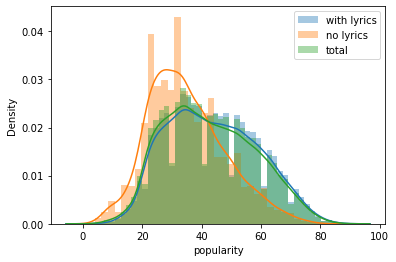

In [31]:
#plot distribution
sns.distplot(df_ly3['popularity'], label='with lyrics')
sns.distplot(df_no_ly3['popularity'], label='no lyrics')
sns.distplot(df3['popularity'], label='total')
plt.legend()

Majority of songs with no lyrics are not popular on Spotify. Distribution of all songs and songs with lyrics are quite similar.

### check with release year

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

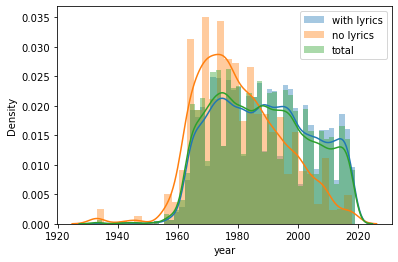

In [34]:
#plot distribution
sns.distplot(df_ly3['year'], label='with lyrics')
sns.distplot(df_no_ly3['year'], label='no lyrics')
sns.distplot(df3['year'], label='total')
plt.legend()

More of songs with no lyrics are old songs. Distribution of all songs and songs with lyrics are quite similar.

### check with other acoustic features

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

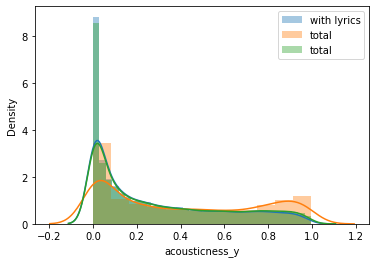

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

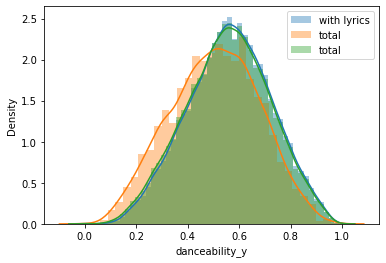

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

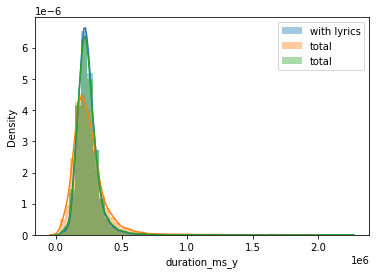

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

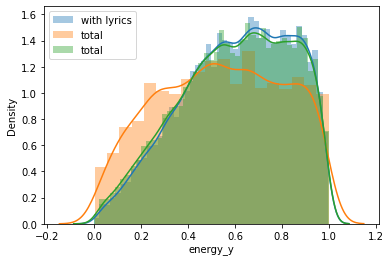

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

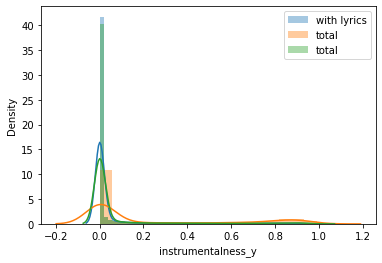

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

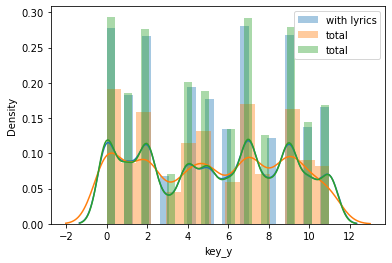

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

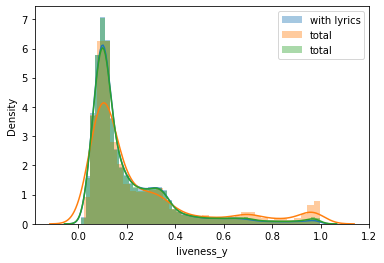

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

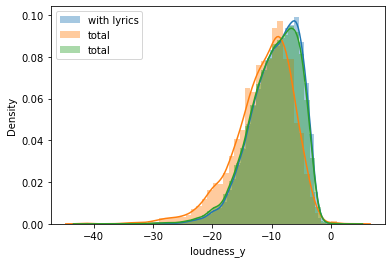

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

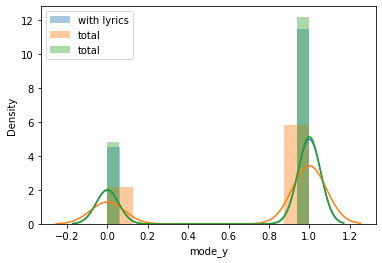

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

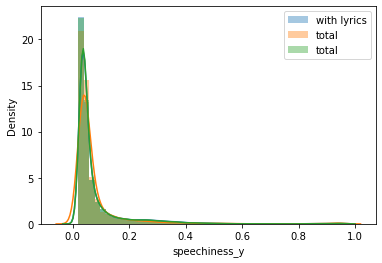

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

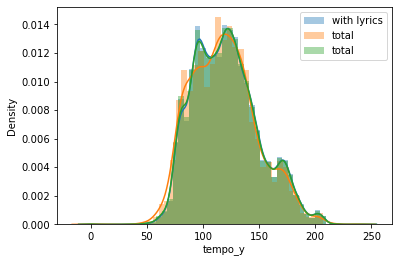

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

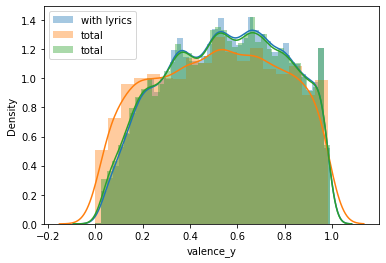

In [36]:
acoustic_col = ['acousticness_y', 'danceability_y', 'duration_ms_y', 'energy_y', 'instrumentalness_y', 
                'key_y', 'liveness_y', 'loudness_y', 'mode_y', 'speechiness_y', 'tempo_y', 'valence_y']
for i in acoustic_col:
    sns.distplot(df_ly3[i], label='with lyrics')
    sns.distplot(df_no_ly3[i], label='total')
    sns.distplot(df3[i], label='total')
    plt.legend()
    plt.show()

#### almost overlap (with lyrics and wholedataset)   

# Conclusion: it's OK to drop songs with no lyrics
##### for hypothesis 1&2
1. songs with no lyrics are less popular on Spotify (50% below 2)
2. when popularity>0, the distribution of popularity, release year and acoustic features between wholedataset and songs_with_lyrics are quite same 
##### for hypothesis 3
1. only 5.8% of songs with no lyrics are on billboard
2. when only look at songs popularity_dummy=1, the distribution of popularity, release year and acoustic features between wholedataset and songs_with_lyrics are almost the same